# Proyek Rekomendasi Anime
- **Nama:** Dzakwan Dawsie
- **Email:** d.dawsie136@gmail.com
- **ID Dicoding:** zack01

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import re
import string
import pandas as pd
import nltk
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

# from google.colab import files

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

## Data Preparation

### Data Loading

Mengupload dataset csv melalui form dibawah ini

In [3]:
uploaded = files.upload()
filenames = list(uploaded.keys())
filename = filenames[0]

print(f"Uploaded file: {filename}")

Saving datasets.csv to datasets (1).csv

Uploaded file: datasets (1).csv


Membuka dataset menggunakan pandas dan menjadikannya DataFrame

In [2]:
anime_df = pd.read_csv('/kaggle/input/anime-dataset/datasets.csv')

Cek jumlah baris dan kolom pada DataFrame

*jika csv sesuai, maka jumlah baris dan kolomnya adalah 19.311 baris x 12 kolom*

In [3]:
jumlah_ulasan, jumlah_kolom = anime_df.shape

print(f"Jumlah baris: {jumlah_ulasan}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah baris: 19311
Jumlah kolom: 12


Preview data

In [4]:
anime_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


### Data Understanding

Cek informasi kolom pada DataFrame

In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


#### Data Understanding

Cek ada berapa data yang null

In [6]:
anime_df.isnull().sum()

uid              0
title            0
synopsis       975
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score          579
img_url        180
link             0
dtype: int64

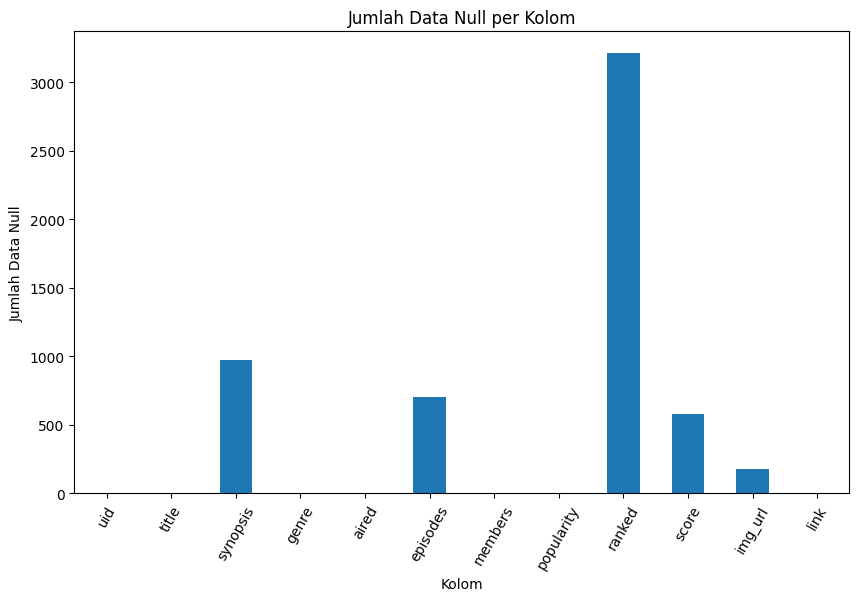

In [7]:
anime_df.isnull().sum().plot(kind='bar', figsize=(10, 6))
plt.title('Jumlah Data Null per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data Null')
plt.xticks(rotation=60)
plt.show()


Cek duplikasi data

Jumlah baris: 19311
Jumlah baris unik berdasarkan uid: 16216
Jumlah duplikat: 3095


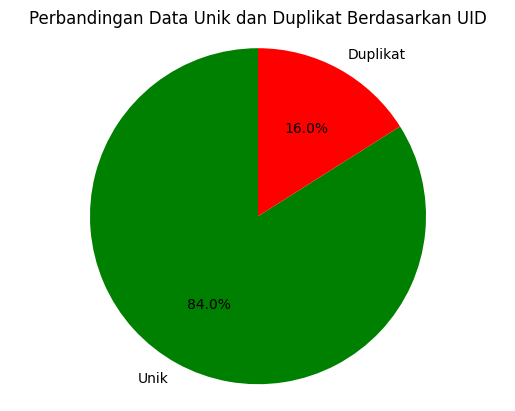

In [8]:
jumlah_baris = anime_df.shape[0]
print(f"Jumlah baris: {jumlah_baris}")

jumlah_uid_unik = anime_df['uid'].nunique()
print("Jumlah baris unik berdasarkan uid:", jumlah_uid_unik)

jumlah_duplikat = jumlah_baris - jumlah_uid_unik
print("Jumlah duplikat:", jumlah_duplikat)

labels = ['Unik', 'Duplikat']
sizes = [jumlah_uid_unik, jumlah_duplikat]
colors = ['green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Perbandingan Data Unik dan Duplikat Berdasarkan UID')
plt.show()

Jumlah baris dengan nilai 'Not available' pada kolom 'aired': 372
Jumlah baris dengan nilai selain 'Not available' pada kolom 'aired': 18939


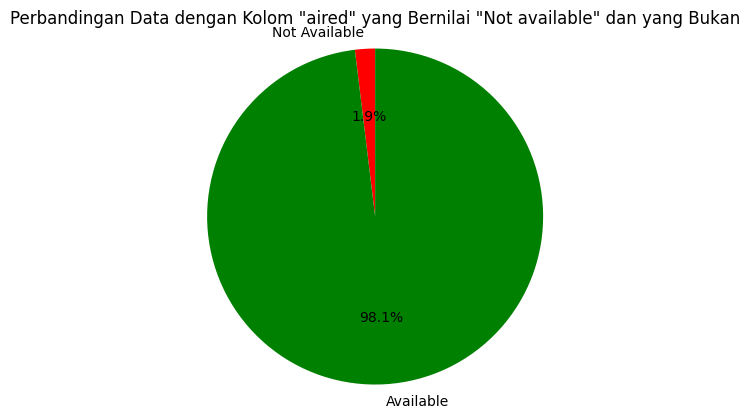

In [9]:
jumlah_not_available = anime_df[anime_df['aired'] == 'Not available'].shape[0]
print("Jumlah baris dengan nilai 'Not available' pada kolom 'aired':", jumlah_not_available)

jumlah_available = anime_df[anime_df['aired'] != 'Not available'].shape[0]
print("Jumlah baris dengan nilai selain 'Not available' pada kolom 'aired':", jumlah_available)

labels = ['Not Available', 'Available']
sizes = [jumlah_not_available, jumlah_available]
colors = ['red', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Perbandingan Data dengan Kolom "aired" yang Bernilai "Not available" dan yang Bukan')
plt.show()

### Data Preprocessing

In [10]:
anime_df.drop(['uid'], axis=1, inplace=True)

print("Jumlah kolom setelah menghapus kolom 'uid'", anime_df.shape[1])

Jumlah kolom setelah menghapus kolom 'uid' 11


Hapus baris `synopsis` yang bernilai null

In [11]:
anime_df.dropna(subset=['synopsis'], inplace=True)

print("Jumlah baris setelah menghapus baris dengan nilai null pada kolom 'synopsis':", anime_df.shape[0])

Jumlah baris setelah menghapus baris dengan nilai null pada kolom 'synopsis': 18336


Hapus kolom `episodes`

In [12]:
anime_df.drop('episodes', axis=1, inplace=True)

print("Jumlah kolom setelah menghapus kolom 'episodes':", anime_df.shape[1])

Jumlah kolom setelah menghapus kolom 'episodes': 10


Replace kolom `ranked` yang bernilai null dengan nilai maksimum dari `ranked`

In [13]:
max_ranked = anime_df['ranked'].max()
anime_df['ranked'].fillna(max_ranked, inplace=True)

print("Jumlah baris setelah mengganti nilai null pada kolom 'ranked' dengan nilai maksimum:", anime_df.shape[0])

Jumlah baris setelah mengganti nilai null pada kolom 'ranked' dengan nilai maksimum: 18336


/tmp/ipykernel_36/2863495300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_df['ranked'].fillna(max_ranked, inplace=True)


Replace kolom `score` yang bernilai null dengan nilai rata-rata dari `score`

In [14]:
mean_score = anime_df['score'].mean()
anime_df['score'].fillna(mean_score, inplace=True)

print("Jumlah baris setelah mengganti nilai null pada kolom 'score' dengan nilai rata-rata:", anime_df.shape[0])

Jumlah baris setelah mengganti nilai null pada kolom 'score' dengan nilai rata-rata: 18336


/tmp/ipykernel_36/4042912171.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_df['score'].fillna(mean_score, inplace=True)


Menghapus kolom `img_url` dan `link` dan `aired`

In [15]:
anime_df.drop(['img_url', 'link', 'aired'], axis=1, inplace=True)

print("Jumlah kolom setelah menghapus kolom 'img_url' dan 'link':", anime_df.shape[1])

Jumlah kolom setelah menghapus kolom 'img_url' dan 'link': 7


Transformasi nilai pada kolom `genre` menjadi kolom tersendiri

In [16]:
unique_genre_list = anime_df['genre'].apply(eval).explode().unique()
unique_genre_list = set(unique_genre_list)

for genre in unique_genre_list:
    if isinstance(genre, str):
        anime_df[genre] = anime_df['genre'].str.contains(genre).astype(int)

Hapus kolom `genre` setelah transformasi

In [17]:
anime_df.drop('genre', axis=1, inplace=True)

print("Jumlah kolom setelah transformasi", anime_df.shape[1])

Jumlah kolom setelah transformasi 49


Menghapus data yang memiliki synopsis selain huruf alphabet

In [19]:
def contains_non_english_characters(text):
    pattern = r'[\u3040-\u309f\u30a0-\u30ff\u4e00-\u9faf\uac00-\ud7a3\u0600-\u06ff\u4e00-\u9fff]'
    if re.search(pattern, text):
        return True
    return False

anime_df = anime_df[~anime_df['synopsis'].apply(contains_non_english_characters)]

Lakukan beberapa teknik preprocessing text terhadap kolom `synopsis` dan membuatkannya kolom baru, yaitu `synopsis_clean`

In [20]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [21]:
anime_df['synopsis_clean'] = anime_df['synopsis'].apply(cleaningText)

anime_df['synopsis_clean'] = anime_df['synopsis_clean'].apply(casefoldingText)

anime_df['synopsis_clean'] = anime_df['synopsis_clean'].apply(tokenizingText)

anime_df['synopsis_clean'] = anime_df['synopsis_clean'].apply(filteringText)

anime_df['synopsis_clean'] = anime_df['synopsis_clean'].apply(toSentence)

Hapus kolom `synopsis` setelah preprocessing text

In [22]:
anime_df.drop('synopsis', axis=1, inplace=True)

Melakukan feature encoding menggunakan TF-ID

In [23]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(anime_df['synopsis_clean'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

print("Jumlah kolom setelah transformasi", tfidf_df.shape[1])

Jumlah kolom setelah transformasi 50926


Hapus `feature` jika hanya dimiliki oleh 1 baris data

In [24]:
cols_to_drop = []
for col in tfidf_df.columns:
  if (tfidf_df[col] > 0).sum() == 1:
    cols_to_drop.append(col)

tfidf_df.drop(columns=cols_to_drop, inplace=True)
print("Jumlah kolom setelah filter kolom", tfidf_df.shape[1])

Jumlah kolom setelah filter kolom 29486


Gabungkan `feature` hasil encoding dengan DataFrame `anime_df` tanpa kolom `title` dan `synopsis_clean`

In [25]:
features = anime_df.drop(['title', 'synopsis_clean'], axis=1, inplace=False).reset_index().merge(tfidf_df, left_index=True, right_index=True)

print("Jumlah kolom setelah digabungkan:", features.shape[1])

Jumlah kolom setelah digabungkan: 29534


## Modelling

Buat model menggunakan cosine similarity

In [26]:
cosine_sim = cosine_similarity(features)

Hapus variabel untuk mengurangi beban RAM

In [27]:
del features

In [32]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_df['title'], columns=anime_df['title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (18229, 18229)


title,Ikenai Boy: Ikasu Maruhi Hand Power,Fullmetal Alchemist: Premium Collection,Sakana no Kuni,Shinya! Tensai Bakabon,Youjuu Sensen Adventure Kid
title,,,,,
Gaki ni Modotte Yarinaoshi!!!,0.774655,0.329811,0.886787,0.956315,0.811730
Mobile Suit Gundam 0080: War in the Pocket,0.086765,0.989471,0.121700,0.243104,0.162852
Tentai Senshi Sunred,0.166712,0.955389,0.166825,0.196234,0.223393
Darker than Black: Kuro no Keiyakusha,0.016385,0.965606,0.012258,0.115361,0.098058
B-Legend! Battle B-Daman,0.543206,0.709272,0.718453,0.905767,0.599588
Chihayafuru 3,0.131836,0.993684,0.239241,0.448210,0.214120
Kurenai no Buta,0.023987,0.966319,0.019998,0.120555,0.104991
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,0.035864,0.972877,0.037196,0.146595,0.119142
Kami nomi zo Shiru Sekai: Flag 0,0.118905,0.989395,0.139016,0.259172,0.203675


## Result

Buat fungsi `get_recommendations()` untuk memproses rekomendasi

In [33]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = anime_df[anime_df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]
    return anime_df['title'].iloc[anime_indices]

Melakukan rekomendasi menggunakan fungsi `get_recommendations()`

In [36]:
title_to_recommend = anime_df['title'].iloc[0]
print("Anda mencari rekomendasi anime untuk anime:", title_to_recommend)

result = get_recommendations(title_to_recommend)
result

Anda mencari rekomendasi anime untuk anime: Haikyuu!! Second Season


7                                      Kimetsu no Yaiba
5                                     Mob Psycho 100 II
2                                         Made in Abyss
13                                              Gintama
14                                 Clannad: After Story
6                         Sen to Chihiro no Kamikakushi
1                               Shigatsu wa Kimi no Uso
9                    Code Geass: Hangyaku no Lelouch R2
10    Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...
16                                        One Punch Man
Name: title, dtype: object

### Evaluation

Munculkan metrik precision

In [48]:
ground_truth = [
    'Haikyuu!!',
    'Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou',
    'Diamond no Ace: Second Season',
    'IDOLiSH7 Second Beat!',
    'Diamond no Ace',
    'Kuroko no Basket',
    'Kuroko no Basket 2nd Season',
    'Free!',
    'Kuroko no Basket 3rd Season ',
    'Chihayafuru',
    ]

all_anime = list(set(ground_truth) | set(result))
y_true = [1 if anime in ground_truth else 0 for anime in all_anime]
y_pred = [1 if anime in result else 0 for anime in all_anime]

precision = precision_score(y_true, y_pred, average='micro')
print("Y True:", y_true)
print("Y Pred:", y_pred)
print("Precision:", precision)

Y True: [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
Y Pred: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Precision: 0.47368421052631576
